<a href="https://colab.research.google.com/github/kennethkwokop/solar-simulation/blob/main/Mixed_Orientation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

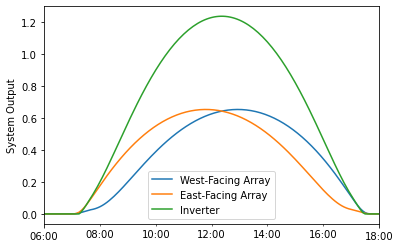

In [ ]:
from pvlib import pvsystem, modelchain, location
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

array_kwargs = dict(
    module_parameters=dict(pdc0=1, gamma_pdc=-0.004),
    temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3)
)

arrays = [
    pvsystem.Array(pvsystem.FixedMount(10, 270), name='West-Facing Array',
                   **array_kwargs),
    pvsystem.Array(pvsystem.FixedMount(10, 90), name='East-Facing Array',
                   **array_kwargs),
]
loc = location.Location(22.4006261, 113.9700839)
system = pvsystem.PVSystem(arrays=arrays, inverter_parameters=dict(pdc0=3))
mc = modelchain.ModelChain(system, loc, aoi_model='physical',
                           spectral_model='no_loss')

times = pd.date_range('2019-12-21 06:00', '2019-12-21 18:00', freq='5min',
                      tz='Hongkong')
weather = loc.get_clearsky(times)
mc.run_model(weather)

fig, ax = plt.subplots()
for array, pdc in zip(system.arrays, mc.results.dc):
    pdc.plot(label=f'{array.name}')
mc.results.ac.plot(label='Inverter')
plt.ylabel('System Output')
plt.legend()
plt.show()




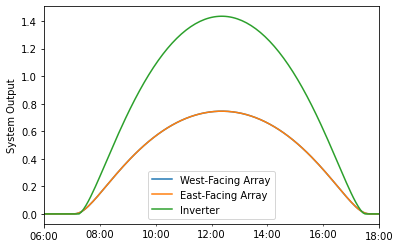

In [ ]:
from pvlib import pvsystem, modelchain, location
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

array_kwargs = dict(
    module_parameters=dict(pdc0=1, gamma_pdc=-0.004),
    temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3)
)

arrays = [
    pvsystem.Array(pvsystem.FixedMount(10, 180), name='West-Facing Array',
                   **array_kwargs),
    pvsystem.Array(pvsystem.FixedMount(10, 180), name='East-Facing Array',
                   **array_kwargs),
]
loc = location.Location(22.4006261, 113.9700839)
system = pvsystem.PVSystem(arrays=arrays, inverter_parameters=dict(pdc0=3))
mc = modelchain.ModelChain(system, loc, aoi_model='physical',
                           spectral_model='no_loss')

times = pd.date_range('2019-12-21 06:00', '2019-12-21 18:00', freq='5min',
                      tz='Hongkong')
weather = loc.get_clearsky(times)
mc.run_model(weather)

fig, ax = plt.subplots()
for array, pdc in zip(system.arrays, mc.results.dc):
    pdc.plot(label=f'{array.name}')
mc.results.ac.plot(label='Inverter')
plt.ylabel('System Output')
plt.legend()
plt.show()